In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from src.utils.datasets.ggimages import OpenImage
from src.utils.datasets.transform import RandomHorizontalFlip, Resize, Compose, XyToCenter
import torchvision.transforms as transforms
from src.utils.display.images import imshow, result_show
from torch.utils.data import DataLoader
from src.utils.datasets.adapter import convert_data
import numpy as np
from src.network.yolo import Yolo
from src.config import VOC_ANCHORS
from src.utils.process_boxes import preprocess_true_boxes
from src.config import IOU_THRESHOLD, TENSORBOARD_PATH
from tensorboardX import SummaryWriter
from datetime import datetime
import time
from PIL import Image


In [3]:
classes = ['__background__', 'Tree', 'Car', 'Flower']

In [4]:
from src.network.base import DarkNet, DarknetBody, YoloBody

model = Yolo(VOC_ANCHORS, classes)
model.load_state_dict(torch.load('./save_model/model_16.pth', map_location='cpu'))

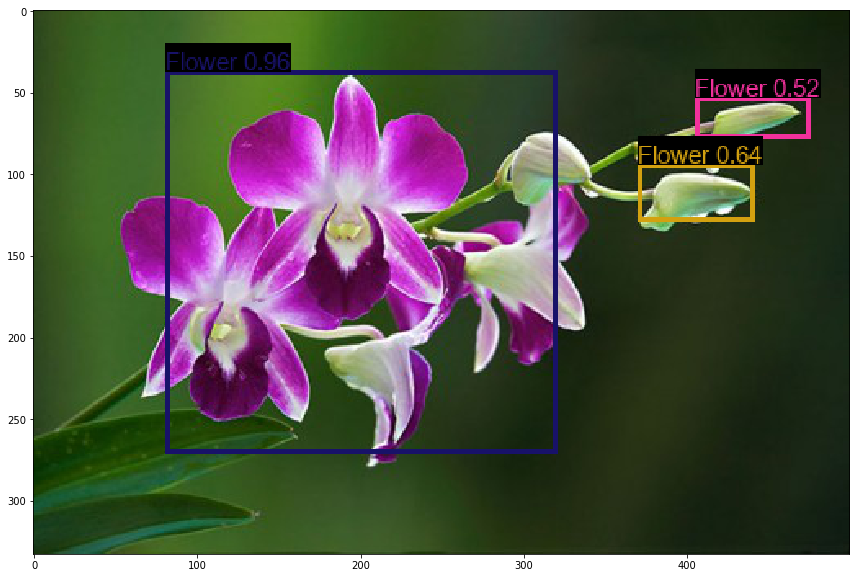

In [5]:
with torch.no_grad():
    img_path = './test_img/ob2.jpg'
    img = Image.open(img_path)
    boxes, scores, classes = model.predict(img_path, score_threshold=0.5, iou_threshold=0.2)
result_show(img, boxes, classes, scores,  ['__background__', 'Tree', 'Car', 'Flower'])